<a href="https://colab.research.google.com/github/Vinnie76/Predicting-Customer-Churn-Classification-Problem/blob/main/LP3_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TEAM PARIS - LP3 - Classification Project (Customer Churn)

### Introduction/Background
Customer attrition is one of the biggest expenditures of any
organization. Customer churn otherwise known as customer attrition or
customer turnover is the percentage of customers that stopped using your
company\'s product or service within a specified timeframe.\
For instance, if you began the year with **500 customers** but later ended
with **480 customers,** the percentage of customers that left would be **4%.**
If we could figure out why a customer leaves and when they leave with
reasonable accuracy, it would immensely help the organization to
strategize their retention initiatives manifold.

In this project, we aim to find the **likelihood of a customer leaving the
organization,** the **key indicators of churn** as well as **the retention
strategies** that can be implemented to avert this problem.

### Business Understanding
The objective of this project aims to throw more light on the churn rate of the customer, the reasons for churn and possible ways to avert more customers from churning and improve the customer attrition. It is important to uunerstand the constumer behaviour which may lead to this outcome, identifying key indicators from our data.  

### Data Understanding
The data for this project is in a csv format. The following describes the columns present in the data.

**_Gender_** -- Whether the customer is a male or a female

**_SeniorCitizen_** -- Whether a customer is a senior citizen or not

**_Partner_** -- Whether the customer has a partner or not (Yes, No)

**_Dependents_** -- Whether the customer has dependents or not (Yes, No)

**_Tenure_** -- Number of months the customer has stayed with the company

**_Phone Service_** -- Whether the customer has a phone service or not (Yes, No)

**_MultipleLines_** -- Whether the customer has multiple lines or not

**_InternetService_** -- Customer's internet service provider (DSL, Fiber Optic, No)

**_OnlineSecurity_** -- Whether the customer has online security or not (Yes, No, No Internet)

**_OnlineBackup_** -- Whether the customer has online backup or not (Yes, No, No Internet)

**_DeviceProtection_** -- Whether the customer has device protection or not (Yes, No, No internet service)

**_TechSupport_** -- Whether the customer has tech support or not (Yes, No, No internet)

**_StreamingTV_** -- Whether the customer has streaming TV or not (Yes, No, No internet service)

**_StreamingMovies_** -- Whether the customer has streaming movies or not (Yes, No, No Internet service)

**_Contract_** -- The contract term of the customer (Month-to-Month, One year, Two year)

**_PaperlessBilling_** -- Whether the customer has paperless billing or not (Yes, No)

**_Payment Method_** -- The customer's payment method (Electronic check, mailed check, Bank transfer(automatic), Credit card(automatic))

**_MonthlyCharges_** -- The amount charged to the customer monthly

**_TotalCharges_** -- The total amount charged to the customer

**_Churn_** -- Whether the customer churned or not (Yes or No)

#### *****_Hypothesis and Questions_*****

**_Hypothesis_**

*__Null:__*
_Customers churn as a result of paying  high charges._

*__Alternate:__*
_Customers who pay high charges do not churn._


**_Questions_**
1. How much do senior citizens and non-senior citizens pays on a monthly basis?

2. How much is generated from customers with internet service?

3. What is the ratio of customers and their type contracts?

4. What categories of contracts generate the most revenue?

5. Do high paying customers use Stream TV or/and Stream movies?

6. Do non-senior citizens have multiple lines?

7. Do customers with dependents spend more than customers without dependents?

8. What payment methods do customers prefer/use more?

#### Importing libraries

In [ ]:
# Importing the required libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
import matplotlib.ticker as mtick

import warnings
warnings.filterwarnings('ignore')

import os
import glob

In [ ]:
# Uploading data to the notebook
from google.colab import files
uploaded = files.upload()

Saving Telco-Customer-Churn.csv to Telco-Customer-Churn.csv


In [ ]:
# Previewing the data
telco = pd.read_csv('Telco-Customer-Churn.csv')
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Listing the columns in the data
telco.columns.to_list()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [ ]:
#getting the shape of the data
telco.shape

(7043, 21)

In [ ]:
#checking for more information about the data
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


From the above information, it appears "TotalCharges" column is an objet, hence we will have to turn it into a numeric variable, preferably a float

In [ ]:
# Change the TotalCharges column into a float
telco['TotalCharges'] = pd.to_numeric(telco['TotalCharges'], errors='coerce').astype(np.float64)


In [ ]:
# Checking the dtaaframe information 
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Our TotalCharges column is now a numeric (float) variable.**

In [ ]:
#investigating missing valyues
telco.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

After changing the data type of the TotalCharges column, we observe that there are **_11 missing values_**. This may not have been discovered if the data type remained as an object

Ususally, we would replace the missing values with the mean of the values of the column, but since the number of missing values are only eleven, we will go ahead and remove those rows from our data set

In [ ]:
# Remove rows with missing values
telco = telco.dropna()

In [ ]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


Now, our data frame size reduces in **_rows from 7043 to 7032_**

In [ ]:
# checking for unique values
telco.nunique()

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

#### Univariate Analysis

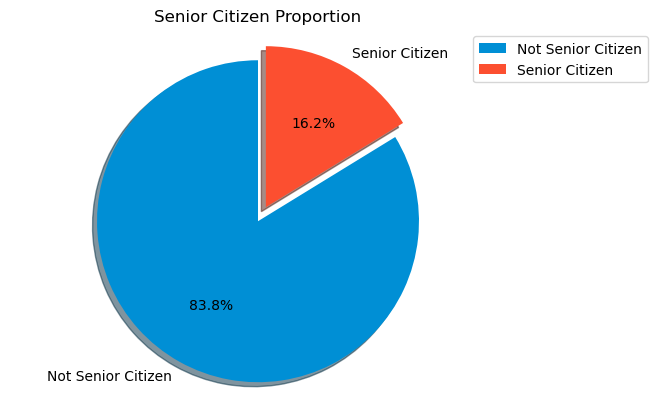

In [ ]:
# Plotting Senior Citizen Proportion

senior_citizen_counts = telco['SeniorCitizen'].value_counts()
labels = ['Not Senior Citizen', 'Senior Citizen']
colors = ['#008fd5', '#fc4f30']
explode = (0, 0.1)
plt.pie(senior_citizen_counts, labels=labels, explode=explode, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('Senior Citizen Proportion')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.ylabel('')
plt.show()


The pie chart tells us the customers are predominantly non-senior citizens. ***Senior citizens*** only accounts for **_16.2%_** of the customers

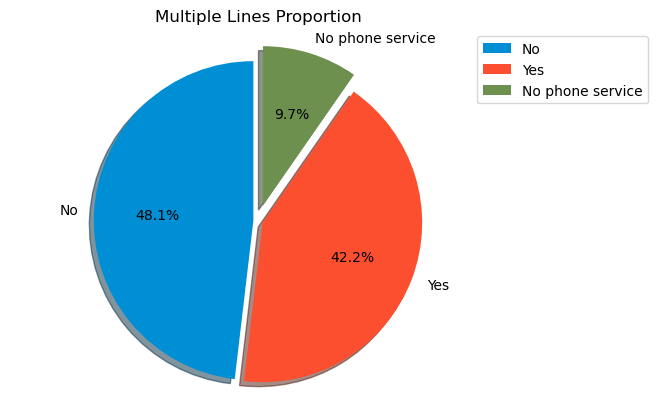

In [ ]:
#Plotting the proportion of multiple lines

#multiple_lines_counts = telco['MultipleLines'].value_counts()
#plt.pie(multiple_lines_counts, labels=multiple_lines_counts.index, autopct='%1.1f%%')
#plt.title('Multiple Lines Proportion')
#plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))
#plt.ylabel('')
#plt.show()

#Plotting the proportion of multiple lines

multiple_lines_counts = telco['MultipleLines'].value_counts()
labels = ['No', 'Yes', 'No phone service']
colors = ['#008fd5', '#fc4f30', '#6d904f']
explode = (0.03, 0.03, 0.1)
plt.pie(multiple_lines_counts, labels=labels, explode=explode, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('Multiple Lines Proportion')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.ylabel('')
plt.show()

**_48.1%_** of customers do not have multiple lines, whereas, **_42.2%_** have multiple lines. This may be because these customers have dependents who may also have phone lines registered in the customers' name.

Also we see that **_9.7%_** of customers do not have a any phone service. We might have to investigate further at some ponint to find out if this group of customers use just internet, without a phone line. Either fiber optic or DSL which do not necessarily require a phone line.

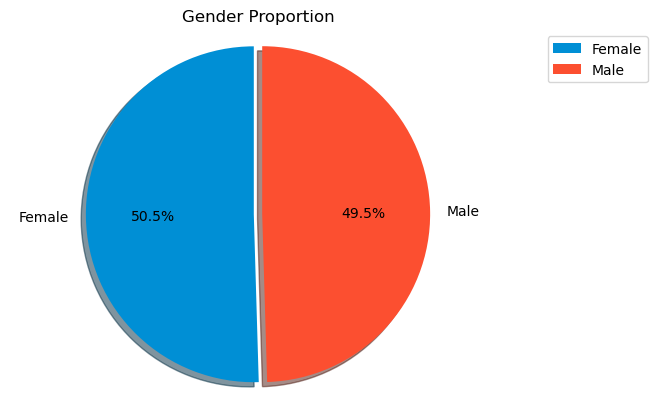

In [ ]:
# Plotting Gender Proportion

gender_counts = telco['gender'].value_counts()
labels = ['Female', 'Male']
colors = ['#008fd5', '#fc4f30']
explode = (0, 0.05)
plt.pie(gender_counts, labels=labels, explode=explode, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('Gender Proportion')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.ylabel('')
plt.show()



___It appears the ration of Female to Male is balanced___

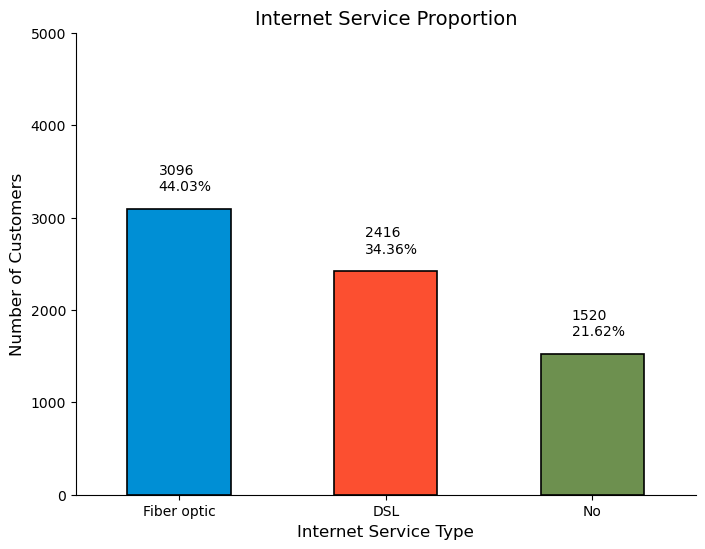

In [ ]:
# Plotting the proportion of Internet Service Users

internet_service_counts = telco['InternetService'].value_counts()
labels = ['DSL', 'Fiber optic', 'No']
colors = ['#008fd5', '#fc4f30','#6d904f']
explode = (0.03, 0.03, 0.1)

percentages = round(internet_service_counts/internet_service_counts.sum()*100, 2).astype(str) + '%'

ax = internet_service_counts.plot(kind='bar', color=colors, edgecolor='black', linewidth=1.2, 
                                  figsize=(8,6), rot=0)
ax.set_title('Internet Service Proportion', fontsize=14)
ax.set_xlabel('Internet Service Type', fontsize=12)
ax.set_ylabel('Number of Customers', fontsize=12)
ax.set_ylim(0, 5000)

for i, p in enumerate(ax.patches):
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}\n{percentages[i]}', (x + 0.15, y + height + 200))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()


**_3,096_** representing **_43.96%_** of customers use **_Fiber optic_** internet service, while customers who use ***DSL*** snd those wthout ***(No)*** internet service are **_34.37%_** and **_21.67%_** respectively.

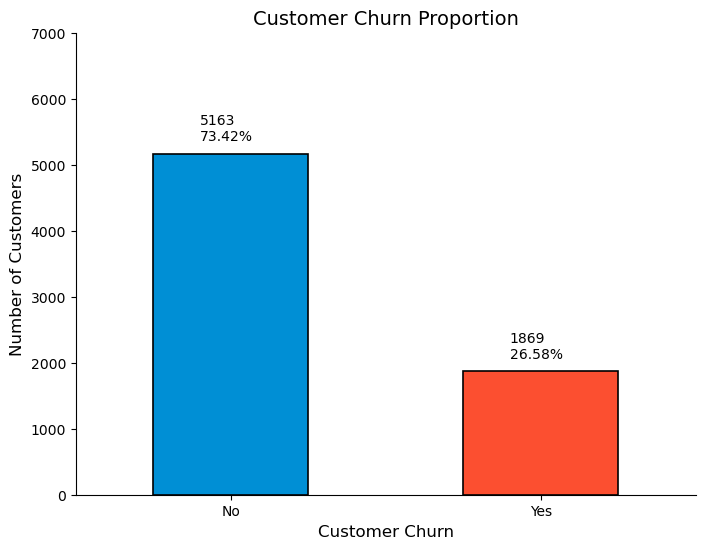

In [ ]:
# Plotting the ratio of customer churn

customer_churn_counts = telco['Churn'].value_counts()
labels = ['No', 'Yes']
colors = ['#008fd5', '#fc4f30']
explode = (0.03, 0.03)

percentages = round(customer_churn_counts/customer_churn_counts.sum()*100, 2).astype(str) + '%'

ax = customer_churn_counts.plot(kind='bar', color=colors, edgecolor='black', linewidth=1.2, 
                                  figsize=(8,6), rot=0)
ax.set_title('Customer Churn Proportion', fontsize=14)
ax.set_xlabel('Customer Churn', fontsize=12)
ax.set_ylabel('Number of Customers', fontsize=12)
ax.set_ylim(0, 7000)

for i, p in enumerate(ax.patches):
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}\n{percentages[i]}', (x + 0.15, y + height + 200))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()


The churn distibtion plot shows the proportion of customers who churn vs those who do not. **__5,174__** customers representing **__73.46%__** stayed and **_1,869_** representing **_26.54%_** of the customers churned.

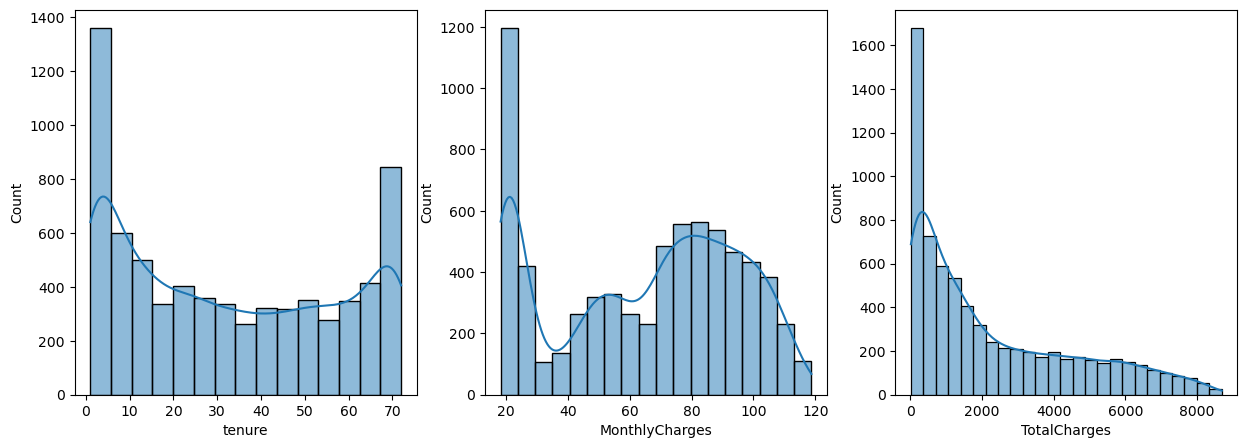

In [ ]:
# Numeric variables
num_vars = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(15,5))
for i, var in enumerate(num_vars):
    plt.subplot(1,3,i+1)
    sns.histplot(telco[var], kde=True)
    plt.xlabel(var)

plt.show()


From the above plots, we can see that the variables **"Tenure"** and **"MonthlyCharges"** have a relatively normal distribution, while the variable **"TotalCharges"** has a skewed distribution.

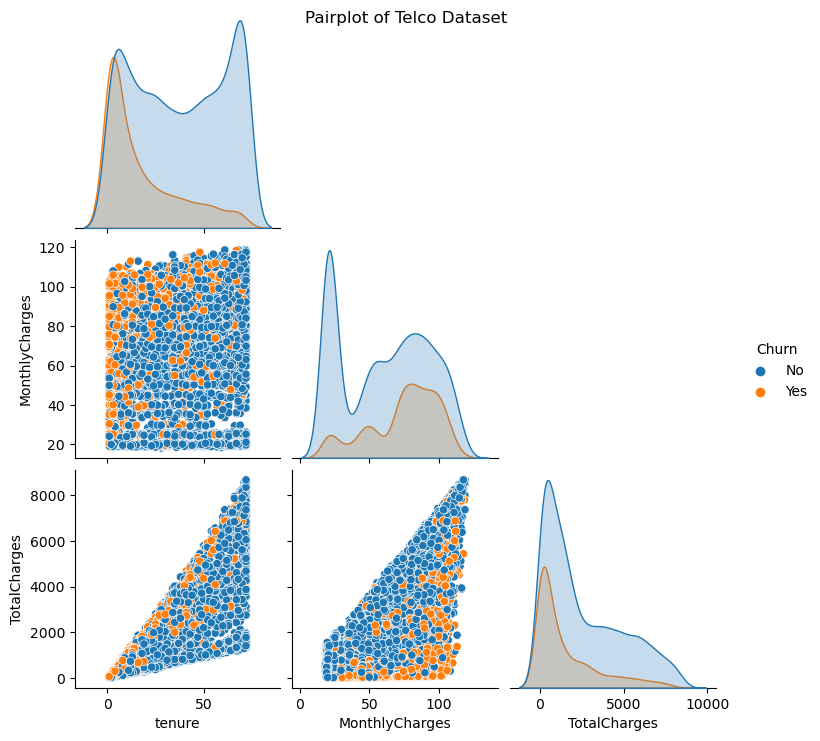

In [ ]:

# select relevant columns for pair plot
columns = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

# create pair plot using seaborn
sns.pairplot(telco[columns], hue='Churn', corner=True)

# Add title to plot
plt.suptitle('Pairplot of Telco Dataset', fontsize=12)

plt.show()


*__From this plot, we observe three key things;__*
1. There is a higher proportion of customers who do not churn. 
2. Those who churn pay about the same amount in monthly charges as those that do not churn.
3. Customers who do not churn stay longer on the network (i.e longer tenure)

#### Bivariate Analysis

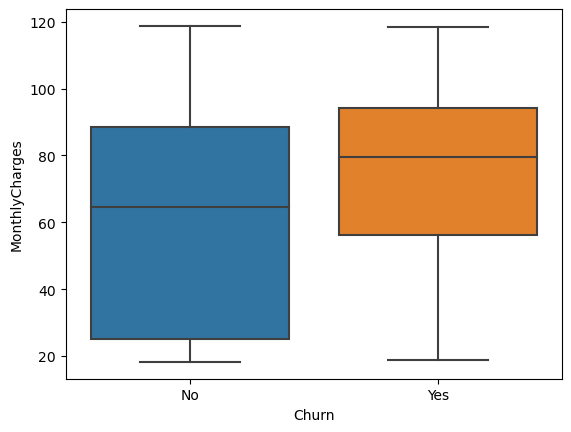

In [ ]:
# Create a boxplot of MonthlyCharges by Churn status
sns.boxplot(x='Churn', y='MonthlyCharges', data=telco)
plt.show()

Customers who churn, pay on average, **_80_** montly-on-month while those that do not churn pay a monthly average of about **_60 to 70_**

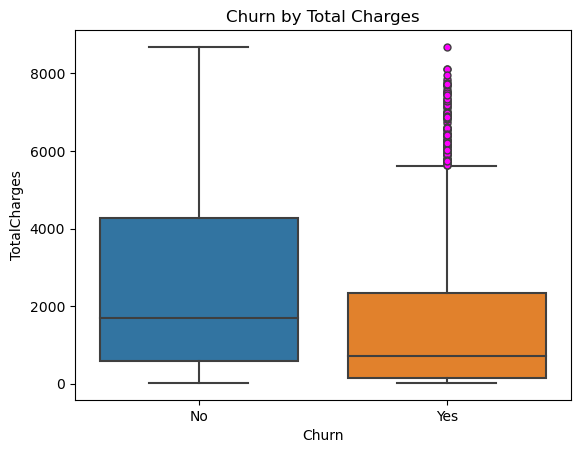

In [ ]:

# Convert TotalCharges to a numeric type
#telco['TotalCharges'] = pd.to_numeric(telco['TotalCharges'], errors='coerce')

# Create a boxplot of TotalCharges by Churn status
sns.boxplot(x='Churn', y='TotalCharges', data=telco, flierprops={'markerfacecolor': 'magenta', 'marker': 'o'})
plt.title('Churn by Total Charges')

plt.show()

Our churn box plot shows us two distinctive boxplots. i.e for csutomers who churned and those that did not churn. Those that churned average about 1000 in total charges while those who remained averaged about almost 2000, twice as much as those who churned. Suprisingly, some outliers, who churned, indicated by he purple dots, had much higher total charges.Since they appear to be high paying customers, it would be a good idea to offer them customized products/service in order to retain them.

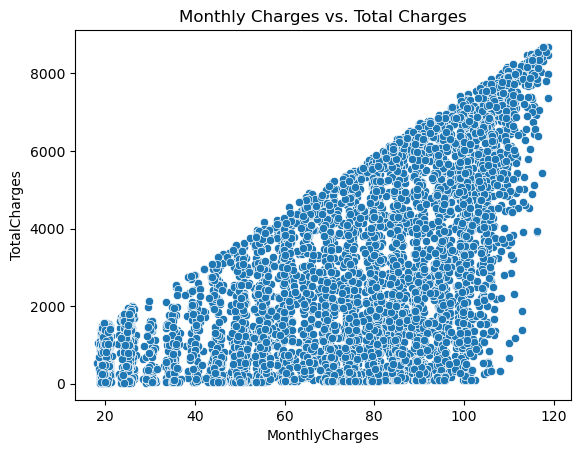

In [ ]:
# Correlation matrix between monthly charges and total charges
sns.scatterplot(data=telco, x='MonthlyCharges', y='TotalCharges')
plt.title('Monthly Charges vs. Total Charges')
plt.show()



Here, we see that the more customers pay on a monthly basis, the more they accrue in total charges. Whereas customers who pay less per month, also tend to pay less over time.

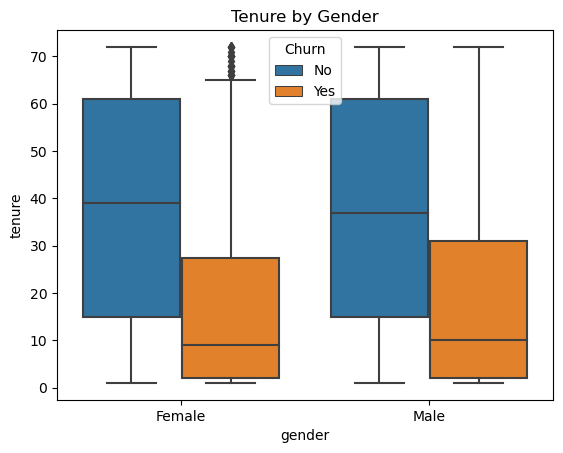

In [ ]:
# Boxplot of tenure by gender
sns.boxplot(data=telco, x='gender', y='tenure', hue='Churn')
plt.title('Tenure by Gender')
plt.show()


The duration of stay on the network is just about the same for both female and male. Also, there is o indication that either gender churned mmore than the other.

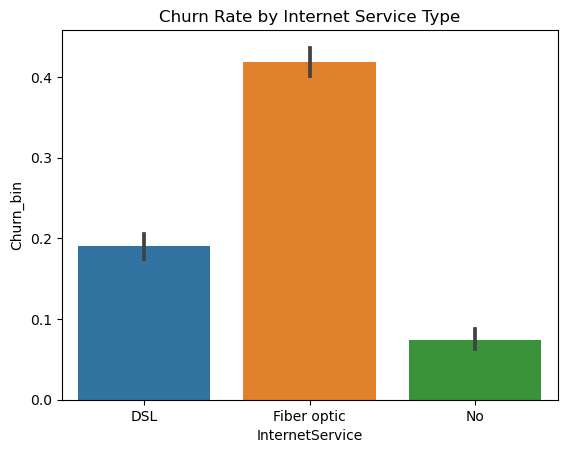

In [ ]:
# Convert Churn column to binary encoding
telco['Churn_bin'] = telco['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Bar chart of churn rate by internet service type
sns.barplot(data=telco, x='InternetService', y='Churn_bin')
plt.title('Churn Rate by Internet Service Type')
plt.show()


From this bar plot, we see that the group of customers with the most churn are those who use the ***fiber optic internet service.*** Now this may not be the actual/only reason they churn but it gives us an idea of some possible issue they may need adressing. About __40%__ of the those with internet service is a huge number proportion which calls for some attention.

#### Multivariate Analysis

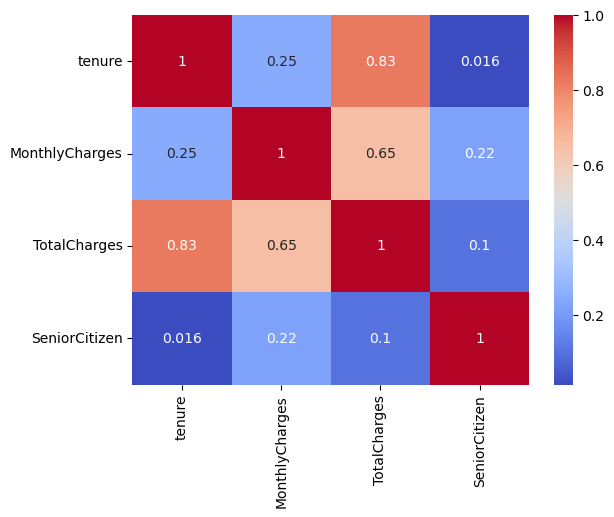

In [ ]:
# Create a heatmap of correlations between numeric variables
corr = telco[['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen']].corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.show()

In the multivariate analysis, Total Charges has a stronger correlation with tenure than the Monthly charges. From the above heatmap, we observe that there is a higher correlation between the *__"tenure"__* and the *__"TotalCharges"__* variables of up to **_83%_**. This indicates that the longer a customer stays with the network, the more total charges they accrue.

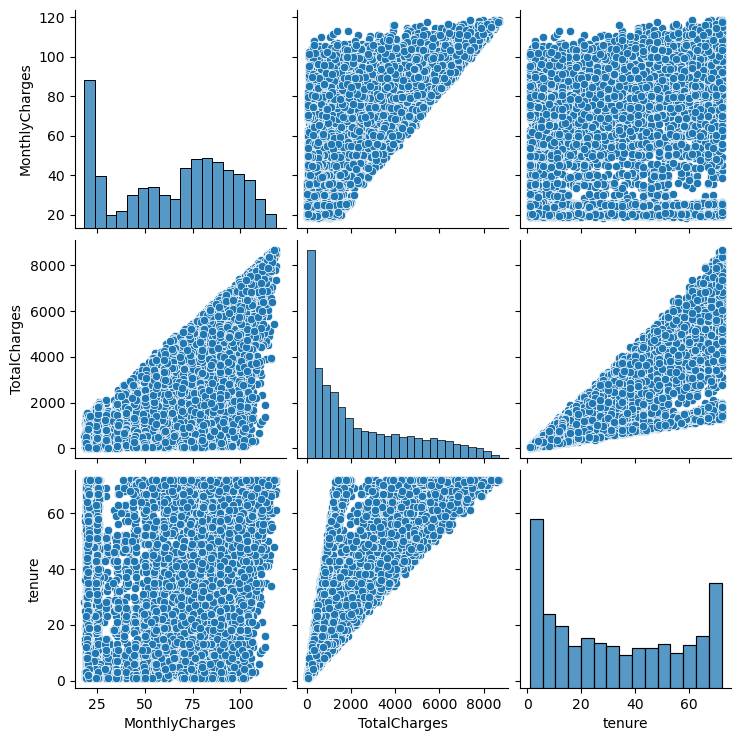

In [ ]:
# Pairwise scatterplot of monthly charges, total charges, and tenure
sns.pairplot(telco[['MonthlyCharges', 'TotalCharges', 'tenure']])
plt.show()


The series of suubplots show how Monthly charges and Total Charges compare to each other against the Tenure of the cutomers.

In [6]:
# Plotting monthly charges for customers wirh deifferent contracts
telco_filtered = telco.dropna(subset=['Churn', 'MonthlyCharges', 'Contract'])

fig = px.box(telco_filtered, x='Contract', y='MonthlyCharges', color='Churn', 
             color_discrete_map={'Yes': '#FF69B4', 'No': '#1E90FF'})

fig.update_layout(title='Monthly Charges by Churn and Contract Type',
                  xaxis_title='Contract Type',
                  yaxis_title='Monthly Charges',
                  width=800, height=500)

fig.show()


*****This visual tells us that customers prefer the one year and two year subscription plan more than the month-on-month plan.***** 

### Answering Our Questions

#### 1. How much do senior citizens and non-senior citizens pays on a monthly basis?

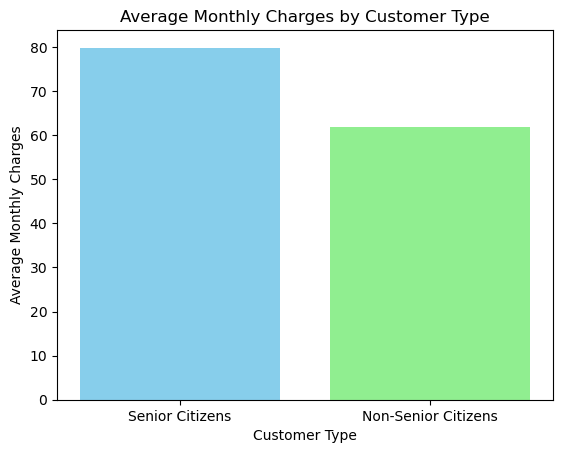

In [ ]:
# Identify senior and non-senior customers
senior_citizens = telco[telco['SeniorCitizen'] == 1]
non_senior_citizens = telco[telco['SeniorCitizen'] == 0]

# Calculate the mean monthly charges for senior citizens and non-senior citizens
mean_monthly_charges_senior = senior_citizens['MonthlyCharges'].mean()
mean_monthly_charges_non_senior = non_senior_citizens['MonthlyCharges'].mean()

# Create a bar plot
x_labels = ['Senior Citizens', 'Non-Senior Citizens']
y_values = [mean_monthly_charges_senior, mean_monthly_charges_non_senior]

plt.bar(x_labels, y_values, color=['skyblue', 'lightgreen'])
plt.xlabel('Customer Type')
plt.ylabel('Average Monthly Charges')
plt.title('Average Monthly Charges by Customer Type')
plt.show()


From the above analysis, we observe that Senior Citizens pay on average about USD 80 per month and Non-Senior Citizens pay about USD 60 per month. In essence, senior citizens pay more than non citizens

#### 2. How much is generated from customers with internet service?

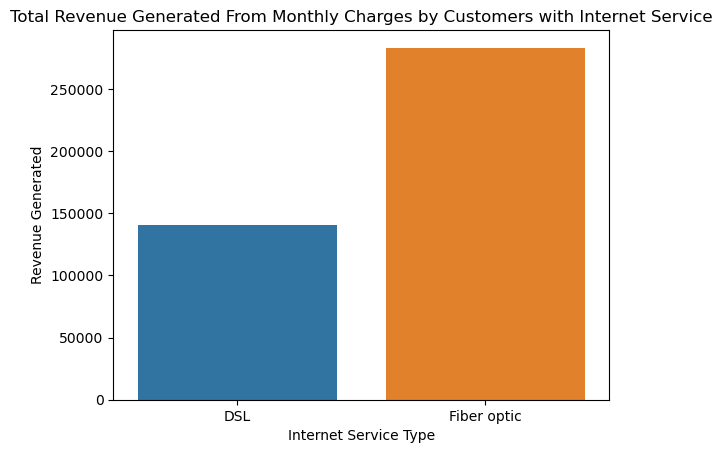

In [ ]:
# Calculate total revenue generated by customers with internet service
internet_service_revenue = telco[telco['InternetService'] != 'No'][['MonthlyCharges', 'InternetService']].groupby('InternetService').agg('count') * telco[telco['InternetService'] != 'No'][['MonthlyCharges', 'InternetService']].groupby('InternetService').agg('mean')
internet_service_revenue.columns = ['TotalRevenue']

# Plot the total revenue generated by customers with internet service
sns.barplot(data=internet_service_revenue, x=internet_service_revenue.index, y='TotalRevenue')
plt.xlabel('Internet Service Type')
plt.ylabel('Revenue Generated')
plt.title('Total Revenue Generated From Monthly Charges by Customers with Internet Service')
plt.show()


Looking at the total average montlhy charges, **_USD 250,000_** was generated from customers who used **_Fiber optic_** internet service, while customers who use DSL contributed about **_USD 140,000_** in revenue to the company's revenue pool.

#### 3. What is the ratio of customers and their type of contracts?

In [7]:
# Calculate ratio of customers by contract type
contract_counts = telco['Contract'].value_counts()
contract_ratios = contract_counts / telco.shape[0]
contract_percentages = contract_ratios * 100

# Create a DataFrame to store the results
df = pd.DataFrame({'Contract Type': contract_counts.index,
                   'Count': contract_counts.values,
                   'Percentage': contract_percentages.values})

# Set the Contract Type column as the index
df.set_index('Contract Type', inplace=True)

# Round the Percentage column to 2 decimal places and add the percentage symbol
df['Percentage'] = df['Percentage'].round(2).astype(str) + '%'

# Create a bar chart using Plotly
fig = go.Figure(data=[go.Bar(x=df.index, y=df['Count'])])

# Add title and axis labels
fig.update_layout(title='Ratio of Customers and their Contract Types',
                  xaxis_title='Contract Type',
                  yaxis_title='Number of Customers')

# Customize the layout of the plot
fig.update_layout(
    xaxis_tickangle=0,
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False, title_text='Count'),
    plot_bgcolor='white'
)

# Add data labels to the bars
fig.update_traces(text=df['Percentage'], textposition='inside')

# Show the plot
fig.show()


From the above bar plot, customrs use more of the month-on-month suubsription than other ontract types, more than twice as much as one year and two year contracts.

#### 4. What categories of contracts generate the most revenue?

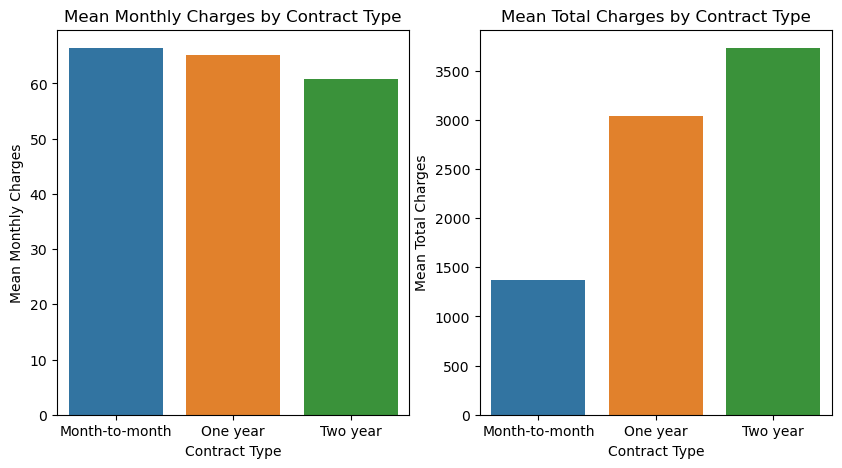

In [ ]:
# Calculate mean monthly charges and total charges for each contract type
contract_revenue = telco.groupby('Contract').agg({'MonthlyCharges':'mean', 'TotalCharges':'mean'}).reset_index()

# Create bar plots to visualize the mean monthly charges and total charges for each contract type
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.barplot(data=contract_revenue, x='Contract', y='MonthlyCharges', ax=ax[0])
ax[0].set_xlabel('Contract Type')
ax[0].set_ylabel('Mean Monthly Charges')
ax[0].set_title('Mean Monthly Charges by Contract Type')

sns.barplot(data=contract_revenue, x='Contract', y='TotalCharges', ax=ax[1])
ax[1].set_xlabel('Contract Type')
ax[1].set_ylabel('Mean Total Charges')
ax[1].set_title('Mean Total Charges by Contract Type')

plt.show()


The plots above show the types of contracts and their how much each of them generates. 
To the left, obsefrve that there isnt much difference among the three contracts. All three contract generate around the **_USD 60_** threshold for the average monthly charges.\
In contrast, the plot on thte right; the average for total charges, shows that month-on-month contract generates the lowest revenue of almost **_USD 1,500_** while two year contract generates the highest revenue of about **_USD 3,500._** 
With this we could say that customers who subscribe to a **_two year plan_** genrate the most revenue for the telecommunication company.

#### 5. Do high paying customers use Stream TV or/and Stream movies?

In [ ]:
# Define high-paying customers as those who pay more than the median monthly charges
median_monthly_charges = telco['MonthlyCharges'].median()
telco['HighPaying'] = telco['MonthlyCharges'] > median_monthly_charges
#telco.head()

In [ ]:
# Create a crosstab between HighPaying and StreamingTV columns
streaming_crosstab = pd.crosstab(telco['HighPaying'], [telco['StreamingTV']])

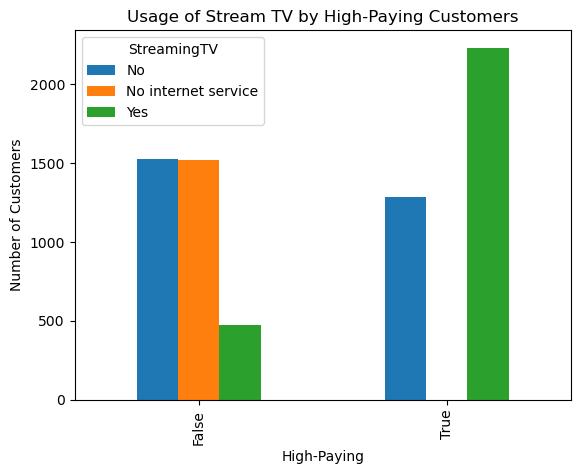

In [ ]:
# Create a stacked bar chart
streaming_crosstab.plot(kind='bar', stacked=False)

# Add labels and title
plt.xlabel('High-Paying')
plt.ylabel('Number of Customers')
plt.title('Usage of Stream TV by High-Paying Customers')

# Show the plot
plt.show()


This graph shows the distribution of high-paying customers that Stream TV or not. To the right, about **_2,000 high-paying_** customers make use of the Stream TV service and **_1,000_** of high-paying customers do not use the Stream TV service.\
We also see that on the left, **_1,500_** customers who are also high-paying customers do not use the service. Looking cosely at the graph, orange bar on the left indicates no internet service. 
We could conclude that high-paying customers do use the **_Stream TV_** service and who do not use the Stream TV service also do not use internet service.

In [8]:
# Define high-paying customers as those who pay more than the median monthly charges
median_monthly_charges = telco['MonthlyCharges'].median()
telco['HighPaying'] = telco['MonthlyCharges'] > median_monthly_charges

# Create a boxplot of monthly charges for customers who use or don't use the "Streaming Movies" service
fig = px.box(data_frame=telco[telco['MonthlyCharges'] > median_monthly_charges], x='StreamingMovies', y='MonthlyCharges', color='StreamingMovies',
             color_discrete_map={'No': '#1E90FF', 'Yes': '#FF69B4'})

# Add labels and title
fig.update_layout(xaxis_title='Streaming Movies', yaxis_title='Monthly Charges',
                  title='Monthly Charges for High Paying Customers by Streaming Movies Usage')

# Show the plot
fig.show()


This boxplot quantifies the amount paid by high-paying customers who use the Streaming Movies service.\
By observing the plot we could say that high-payig customers who do not use the Streaming Movies service pay about **_USD 80_** per month while high-payig customers who Stream Movies pay about **_USD 95_** in monthly charges

#### 6. Do non-senior citizens have multiple lines?

In [9]:
# Create a new DataFrame containing only non-senior citizens
non_senior_df = telco[telco['SeniorCitizen'] == 0]

# Group by the number of lines
line_counts = non_senior_df['MultipleLines'].value_counts()

# Calculate the percentage of each bar value
line_percents = line_counts / line_counts.sum() * 100

# Round the percentage to two decimal places
line_percents = line_percents.round(2)

# Create the bar chart using Plotly
import plotly.express as px

fig = px.bar(x=line_counts.index, y=line_counts.values, color=line_counts.index,
             labels={'x': 'Multiple Lines', 'y': 'Number of Customers'},
             title='Do Non-Senior Citizens Have Multiple Lines?')

# Add percentage labels to each bar
for i in range(len(line_counts)):
    fig.add_annotation(x=line_counts.index[i], y=line_counts.values[i], text=f'{line_percents[i]}%', showarrow=False,
                       font=dict(color='black', size=14), yshift=10)

# Show the interactive plot
fig.show()


From the chart we can see that **_51%_** of non-senior citizens are more likely to have only one line with **_39%_** of them having multiple lines.

#### 7. Do customers with dependents spend more than customers without dependents?

In [12]:
# Plotting monthly charges by dependents

cf.go_offline()

fig = px.histogram(telco, x="Dependents", y="MonthlyCharges", color="Dependents", nbins=20, histfunc='avg')
fig.update_layout(title="Monthly Charges by Dependents Status", xaxis_title="Dependents", yaxis_title="Monthly Charges")
fig.show()


From the plot, the monthly average paid by customers with dependents is about **_USD 59_** while customers without dependents pay an average of **_USD 67_** in monthly charges.\
Hence, customers with dependents spend less than customers without dependents. 

#### 8. What payment methods do customers prefer/use more?

In [13]:
# Group by PaymentMethod and count the number of customers
payment_counts = telco.groupby('PaymentMethod')['customerID'].count()

# Calculate the percentage of each bar value
payment_percents = payment_counts / payment_counts.sum() * 100

# Round the percentage to two decimal places
payment_percents = payment_percents.round(2)

# Create the bar chart using Plotly
fig = px.bar(x=payment_counts.index, y=payment_counts.values, color=payment_counts.index,
             labels={'x': 'Payment Method', 'y': 'Number of Customers'},
             title='Preferred Payment Methods by Customers')

# Add percentage labels to each bar in white
for i in range(len(payment_counts)):
    fig.add_annotation(x=payment_counts.index[i], y=payment_counts.values[i], text=f'{payment_percents[i]}%', showarrow=False,
                       font=dict(color='black', size=14), yshift=10)

# Show the interactive plot
fig.show()


From the above plot, Electronic Check appears to be the most preferred means of payment customers use.\
**_2,365_** customers representing **_33.63%_** prefer to use electronic check.

### FEATURE ENGINEERING

In [ ]:
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_bin,HighPaying
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,False
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,0,False
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,False
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,False
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,True


In [ ]:
telco.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_bin
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,0.265785
std,0.368844,24.545260,30.085974,2266.771362,0.441782
min,0.000000,1.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.587500,401.450000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,55.000000,89.862500,3794.737500,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


#### During the analysis, two new features were created;
***1. Churn_bin, mapping the Churn values as Yes = 1, and No, 0***\
Alternatively, the code below could be used to acomplish the same results
#Perform feature engineering\
#telco['Churn_bin'] = telco['Churn'].map({'No': 0, 'Yes': 1})

***2. HighPaying which indicates customers that pay above a certain amount. In this case, the median was used as the threshold***\
Also, to accomplish this the code below was used;\
#telco['HighPaying'] = telco['MonthlyCharges'] > telco['MonthlyCharges'].median()

In [ ]:
# Define the categorical columns
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'HighPaying']

# Perform feature engineering
#telco['Churn_bin'] = telco['Churn'].map({'No': 0.0, 'Yes': 1.0})
#telco['HighPaying'] = telco['MonthlyCharges'] > telco['MonthlyCharges'].median()

# Encode categorical variables
label_encoder = LabelEncoder()

for col in categorical_cols:
    telco[col] = label_encoder.fit_transform(telco[col])

# Apply one-hot encoding
one_hot_encoder = OneHotEncoder(drop='first', sparse=False)
encoded_features = one_hot_encoder.fit_transform(telco[categorical_cols])

# Get the encoded feature names
feature_names = one_hot_encoder.get_feature_names_out(categorical_cols)

# Create a dataframe with encoded features
encoded_df = pd.DataFrame(encoded_features, columns=feature_names)

# Concatenate the encoded features with the original dataframe
telco_encoded = pd.concat([telco.drop(categorical_cols, axis=1), encoded_df], axis=1)


In [ ]:
telco_encoded.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,Churn_bin,gender_1,SeniorCitizen_1,Partner_1,Dependents_1,...,StreamingTV_2,StreamingMovies_1,StreamingMovies_2,Contract_1,Contract_2,PaperlessBilling_1,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3,HighPaying_1
0,7590-VHVEG,1.0,29.85,29.85,No,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,5575-GNVDE,34.0,56.95,1889.50,No,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3668-QPYBK,2.0,53.85,108.15,Yes,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,7795-CFOCW,45.0,42.30,1840.75,No,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9237-HQITU,2.0,70.70,151.65,Yes,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [ ]:
# Separate the 'Churn' column as the target
target = telco['Churn']

# Encode the target variable
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

target_encoded

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
pd.DataFrame(target_encoded).head()

,0
0,0
1,0
2,1
3,0
4,1


In [ ]:
# Create a new dataframe with encoded features and target
encoded_data = pd.concat([telco_encoded, pd.Series(target_encoded, name='Churn_encoded')], axis=1)
encoded_data.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,Churn_bin,gender_1,SeniorCitizen_1,Partner_1,Dependents_1,...,StreamingMovies_1,StreamingMovies_2,Contract_1,Contract_2,PaperlessBilling_1,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3,HighPaying_1,Churn_encoded
0,7590-VHVEG,1.0,29.85,29.85,No,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,5575-GNVDE,34.0,56.95,1889.50,No,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3668-QPYBK,2.0,53.85,108.15,Yes,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,7795-CFOCW,45.0,42.30,1840.75,No,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9237-HQITU,2.0,70.70,151.65,Yes,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0


In [ ]:
# Select only the non-numerical columns
#encoded_data = encoded_data.select_dtypes(exclude=['int64', 'float64'])
#encoded_data.head()

# Drop unwanted columns
encoded_data = encoded_data.drop(columns=['customerID', 'gender_1', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn', 'Churn_bin'])
encoded_data.head()

,SeniorCitizen_1,Partner_1,Dependents_1,PhoneService_1,MultipleLines_1,MultipleLines_2,InternetService_1,InternetService_2,OnlineSecurity_1,OnlineSecurity_2,...,StreamingMovies_1,StreamingMovies_2,Contract_1,Contract_2,PaperlessBilling_1,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3,HighPaying_1,Churn_encoded
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0


#### Balancing Our Dataset

During our univariate analysis, we observed that the target variable, "Churn" was highly imbalanced.
**__5,174__** customers representing **__73.46%__** did not churn while **_1,869_** representing **_26.54%_** of the customers churned.

Before proceeding with modeling, we need to ensure that this is balanced in order to ensure that the model is exposed to a more representative sample of the data, reducing the bias towards the majority class.

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(encoded_data, encoded_data['Churn_encoded'], test_size=0.2, random_state=42)


In [ ]:
# Checing the shape after splitting
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5634, 28), (1409, 28), (5634,), (1409,))

In [ ]:
# Checking for missing values in the target variable
print(y_train.isnull().sum())


9


In [ ]:
# Drop rows with missing values in the target variable
missing_rows = y_train.isnull()
X_train = X_train[~missing_rows]
y_train = y_train[~missing_rows]


In [ ]:
# Crosschecking if the missing values in the target variable have been dealt with
print(y_train.isnull().sum())

0


In [ ]:
# Apply SMOTE to balance the target variable
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)


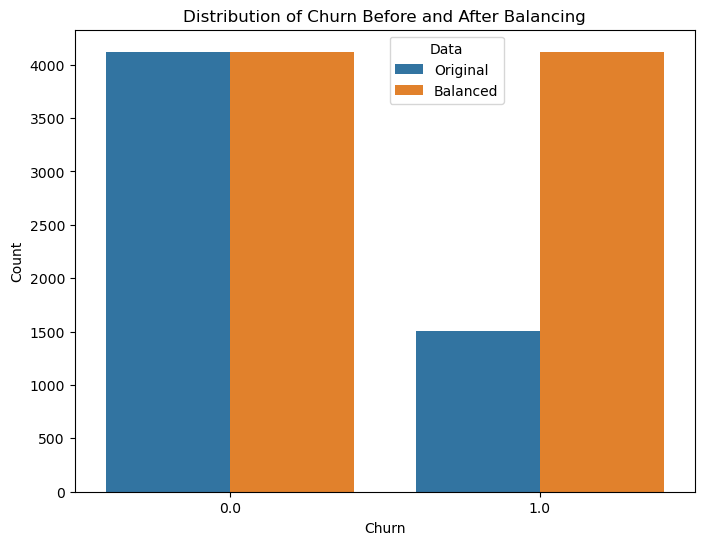

In [ ]:
import seaborn as sns

# Combine the original and balanced data for visualization
combined_data = pd.concat([X_train, y_train.rename('Churn')], axis=1)
combined_data['Data'] = 'Original'
combined_data_balanced = pd.concat([X_train_balanced, y_train_balanced.rename('Churn')], axis=1)
combined_data_balanced['Data'] = 'Balanced'
combined_data_combined = pd.concat([combined_data, combined_data_balanced])

# Create a countplot to visualize the distributions
plt.figure(figsize=(8, 6))
sns.countplot(data=combined_data_combined, x='Churn', hue='Data')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Distribution of Churn Before and After Balancing')
plt.legend(title='Data', bbox_to_anchor=(0.6, 1), loc= 'upper center')
plt.show()


##### Notice that the churn distribution is now balanced